# Time Series Clustering Exercise

<bl> created by Federica Bianco 
<bl> modified by Eve Marenghi December 2018

In [1]:
# import packages 
import pandas as pd
import zipfile 
import geopandas as gp
import functools
import numpy as np
import matplotlib.pyplot as plt
import urllib
import numpy as np
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib as mpl
import scipy.cluster as scp
%matplotlib inline 

## Download the data

In [2]:
# download census bureau business data from Professor Bianco's repo
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp94totals.zip?raw=true','zbp94totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp95totals.zip?raw=true','zbp95totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp96totals.zip?raw=true','zbp96totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp97totals.zip?raw=true','zbp97totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp98totals.zip?raw=true','zbp98totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp99totals.zip?raw=true','zbp99totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp00totals.zip?raw=true','zbp00totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp01totals.zip?raw=true','zbp01totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp02totals.zip?raw=true','zbp02totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp03totals.zip?raw=true','zbp03totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp04totals.zip?raw=true','zbp04totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp05totals.zip?raw=true','zbp05totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp06totals.zip?raw=true','zbp06totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp07totals.zip?raw=true','zbp07totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp08totals.zip?raw=true','zbp08totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp09totals.zip?raw=true','zbp09totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp10totals.zip?raw=true','zbp10totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp11totals.zip?raw=true','zbp11totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp12totals.zip?raw=true','zbp12totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp13totals.zip?raw=true','zbp13totals.gz')
urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp14totals.zip?raw=true','zbp14totals.gz')

('zbp14totals.gz', <http.client.HTTPMessage at 0x7f15241f1898>)

In [3]:
# move the data to PUIdata 
!mv zbp94totals.gz $PUIDATA
!mv zbp95totals.gz $PUIDATA
!mv zbp96totals.gz $PUIDATA
!mv zbp97totals.gz $PUIDATA
!mv zbp98totals.gz $PUIDATA
!mv zbp99totals.gz $PUIDATA
!mv zbp00totals.gz $PUIDATA
!mv zbp01totals.gz $PUIDATA
!mv zbp02totals.gz $PUIDATA
!mv zbp03totals.gz $PUIDATA
!mv zbp04totals.gz $PUIDATA
!mv zbp05totals.gz $PUIDATA
!mv zbp06totals.gz $PUIDATA
!mv zbp07totals.gz $PUIDATA
!mv zbp08totals.gz $PUIDATA
!mv zbp09totals.gz $PUIDATA
!mv zbp10totals.gz $PUIDATA
!mv zbp11totals.gz $PUIDATA
!mv zbp12totals.gz $PUIDATA
!mv zbp13totals.gz $PUIDATA
!mv zbp14totals.gz $PUIDATA

In [4]:
# unzip the files
zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp94totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp95totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp96totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp97totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp98totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp99totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp00totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp01totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp02totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp03totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp04totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp05totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp06totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp07totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp08totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp09totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp10totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp11totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp12totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp13totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp14totals.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [5]:
# read the files in to data frames
zbp94 = pd.read_csv(os.getenv("PUIDATA") + "/zbp94totals.txt")
zbp95 = pd.read_csv(os.getenv("PUIDATA") + "/zbp95totals.txt")
zbp96 = pd.read_csv(os.getenv("PUIDATA") + "/zbp96totals.txt")
zbp97 = pd.read_csv(os.getenv("PUIDATA") + "/zbp97totals.txt")
zbp98 = pd.read_csv(os.getenv("PUIDATA") + "/zbp98totals.txt")
zbp99 = pd.read_csv(os.getenv("PUIDATA") + "/zbp99totals.txt")
zbp00 = pd.read_csv(os.getenv("PUIDATA") + "/zbp00totals.txt")
zbp01 = pd.read_csv(os.getenv("PUIDATA") + "/zbp01totals.txt")
zbp02 = pd.read_csv(os.getenv("PUIDATA") + "/zbp02totals.txt")
zbp03 = pd.read_csv(os.getenv("PUIDATA") + "/zbp03totals.txt")
zbp04 = pd.read_csv(os.getenv("PUIDATA") + "/zbp04totals.txt")
zbp05 = pd.read_csv(os.getenv("PUIDATA") + "/zbp05totals.txt")
zbp06 = pd.read_csv(os.getenv("PUIDATA") + "/zbp06totals.txt")
zbp07 = pd.read_csv(os.getenv("PUIDATA") + "/zbp07totals.txt")
zbp08 = pd.read_csv(os.getenv("PUIDATA") + "/zbp08totals.txt")
zbp09 = pd.read_csv(os.getenv("PUIDATA") + "/zbp09totals.txt")
zbp10 = pd.read_csv(os.getenv("PUIDATA") + "/zbp10totals.txt")
zbp11 = pd.read_csv(os.getenv("PUIDATA") + "/zbp11totals.txt")
zbp12 = pd.read_csv(os.getenv("PUIDATA") + "/zbp12totals.txt")
zbp13 = pd.read_csv(os.getenv("PUIDATA") + "/zbp13totals.txt")
zbp14 = pd.read_csv(os.getenv("PUIDATA") + "/zbp14totals.txt")

In [6]:
# download the zipcode data from NYC open data 
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip','zips.gz')

('zips.gz', <http.client.HTTPMessage at 0x7f15242163c8>)

In [7]:
# move to PUIdata
!mv zips.gz $PUIDATA

In [8]:
# unzip file.gz
zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/zips.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [9]:
# read the zip code shape file into a geodataframe
zip_shp = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/ZIP_CODE_040114.shp')

# Data Cleaning

In [10]:
# rename columns for each census business data table 
zbp94 = zbp94.rename(columns={'est':'est94'})
zbp95 = zbp95.rename(columns={'est':'est95'})
zbp96 = zbp96.rename(columns={'est':'est96'})
zbp97 = zbp97.rename(columns={'est':'est97'})
zbp98 = zbp98.rename(columns={'ZIP':'zip', 'NAME':'name', 'EST':'est98'})
zbp99 = zbp99.rename(columns={'ZIP':'zip', 'NAME':'name', 'EST':'est99'})
zbp00 = zbp00.rename(columns={'ZIP':'zip', 'NAME':'name', 'EST':'est00'})
zbp01 = zbp01.rename(columns={'ZIP':'zip', 'NAME':'name', 'EST':'est01'})
zbp02 = zbp02.rename(columns={'ZIP':'zip', 'NAME':'name', 'EST':'est02'})
zbp03 = zbp03.rename(columns={'est':'est03'})
zbp04 = zbp04.rename(columns={'est':'est04'})
zbp05 = zbp05.rename(columns={'est':'est05'})
zbp06 = zbp06.rename(columns={'est':'est06'})
zbp07 = zbp07.rename(columns={'est':'est07'})
zbp08 = zbp08.rename(columns={'est':'est08'})
zbp09 = zbp09.rename(columns={'est':'est09'})
zbp10 = zbp10.rename(columns={'est':'est10'})
zbp11 = zbp11.rename(columns={'est':'est11'})
zbp12 = zbp12.rename(columns={'est':'est12'})
zbp13 = zbp13.rename(columns={'est':'est13'})
zbp14 = zbp14.rename(columns={'est':'est14'})

In [11]:
# limit to NYC zip codes
zbp94_nyc = zbp94.loc[(zbp94.zip >= 10000) & (zbp94.zip < 11500)]
zbp95_nyc = zbp95.loc[(zbp95.zip >= 10000) & (zbp95.zip < 11500)]
zbp96_nyc = zbp96.loc[(zbp96.zip >= 10000) & (zbp96.zip < 11500)]
zbp97_nyc = zbp97.loc[(zbp97.zip >= 10000) & (zbp97.zip < 11500)]
zbp98_nyc = zbp98.loc[(zbp98.zip >= 10000) & (zbp98.zip < 11500)]
zbp99_nyc = zbp99.loc[(zbp99.zip >= 10000) & (zbp99.zip < 11500)]
zbp00_nyc = zbp00.loc[(zbp00.zip >= 10000) & (zbp00.zip < 11500)]
zbp01_nyc = zbp01.loc[(zbp01.zip >= 10000) & (zbp01.zip < 11500)]
zbp02_nyc = zbp02.loc[(zbp02.zip >= 10000) & (zbp02.zip < 11500)]
zbp03_nyc = zbp03.loc[(zbp03.zip >= 10000) & (zbp03.zip < 11500)]
zbp04_nyc = zbp04.loc[(zbp04.zip >= 10000) & (zbp04.zip < 11500)]
zbp05_nyc = zbp05.loc[(zbp05.zip >= 10000) & (zbp05.zip < 11500)]
zbp06_nyc = zbp06.loc[(zbp06.zip >= 10000) & (zbp06.zip < 11500)]
zbp07_nyc = zbp07.loc[(zbp07.zip >= 10000) & (zbp07.zip < 11500)]
zbp08_nyc = zbp08.loc[(zbp08.zip >= 10000) & (zbp08.zip < 11500)]
zbp09_nyc = zbp09.loc[(zbp09.zip >= 10000) & (zbp09.zip < 11500)]
zbp10_nyc = zbp10.loc[(zbp10.zip >= 10000) & (zbp10.zip < 11500)]
zbp11_nyc = zbp11.loc[(zbp11.zip >= 10000) & (zbp11.zip < 11500)]
zbp12_nyc = zbp12.loc[(zbp12.zip >= 10000) & (zbp12.zip < 11500)]
zbp13_nyc = zbp13.loc[(zbp13.zip >= 10000) & (zbp13.zip < 11500)]
zbp14_nyc = zbp14.loc[(zbp14.zip >= 10000) & (zbp14.zip < 11500)]

In [12]:
# keep only the columns we need (zip, name, and est)
zbp94_trunc = zbp94_nyc[['zip', 'name', 'est94']]
zbp95_trunc = zbp95_nyc[['zip', 'est95']]
zbp96_trunc = zbp96_nyc[['zip', 'est96']]
zbp97_trunc = zbp97_nyc[['zip', 'est97']]
zbp98_trunc = zbp98_nyc[['zip', 'est98']]
zbp99_trunc = zbp99_nyc[['zip', 'est99']]
zbp00_trunc = zbp00_nyc[['zip', 'est00']]
zbp01_trunc = zbp01_nyc[['zip', 'est01']]
zbp02_trunc = zbp02_nyc[['zip', 'est02']]
zbp03_trunc = zbp03_nyc[['zip', 'est03']]
zbp04_trunc = zbp04_nyc[['zip', 'est04']]
zbp05_trunc = zbp05_nyc[['zip', 'est05']]
zbp06_trunc = zbp06_nyc[['zip', 'est06']]
zbp07_trunc = zbp07_nyc[['zip', 'est07']]
zbp08_trunc = zbp08_nyc[['zip', 'est08']]
zbp09_trunc = zbp09_nyc[['zip', 'est09']]
zbp10_trunc = zbp10_nyc[['zip', 'est10']]
zbp11_trunc = zbp11_nyc[['zip', 'est11']]
zbp12_trunc = zbp12_nyc[['zip', 'est12']]
zbp13_trunc = zbp13_nyc[['zip', 'est13']]
zbp14_trunc = zbp14_nyc[['zip', 'est14']]

In [13]:
# join dfs on zip code 
dfs = [zbp94_trunc, zbp95_trunc, zbp96_trunc, zbp97_trunc, zbp98_trunc, zbp99_trunc, zbp00_trunc, zbp01_trunc, 
      zbp02_trunc, zbp03_trunc, zbp04_trunc, zbp05_trunc, zbp06_trunc, zbp07_trunc, zbp08_trunc, zbp09_trunc, 
      zbp10_trunc, zbp11_trunc, zbp12_trunc, zbp13_trunc, zbp14_trunc]
zbp_all = functools.reduce(lambda  left,right: pd.merge(left,right,on=['zip'],
                                            how='outer'), dfs)

In [14]:
# check column names 
zbp_all.columns

Index(['zip', 'name', 'est94', 'est95', 'est96', 'est97', 'est98', 'est99',
       'est00', 'est01', 'est02', 'est03', 'est04', 'est05', 'est06', 'est07',
       'est08', 'est09', 'est10', 'est11', 'est12', 'est13', 'est14'],
      dtype='object')

In [15]:
# lowercase names 
zbp_all['name'] = zbp_all['name'].str.lower()

In [16]:
# drop na values 
zbp_all.dropna(inplace=True)
zbp_all.shape

(423, 23)

In [17]:
# limit further to nyc zips 
zbp_nyc = zbp_all[(zbp_all['name'] == "new york, ny") | (zbp_all['name'] == "bronx, ny") | 
                     (zbp_all['name'] == "brooklyn, ny") | (zbp_all['name'] == "staten island, ny") |
                     (zbp_all['name'] == "queens village, ny") | (zbp_all['name'] == "floral park, ny") |
                     (zbp_all['name'] == "long island city, ny") | (zbp_all['name'] == "jamaica, ny") |
                     (zbp_all['name'] == "flushing, ny") | (zbp_all['name'] == "inwood, ny") |
                     (zbp_all['name'] == "glen oaks, ny")]

## Standardize the data. Subtract the mean and divide by the standard deviation for each observation (each row)

In [18]:
# drop name column 
zbp_nyc_yrs = zbp_nyc.drop(['name'], axis=1)

In [19]:
# make zip the new index 
zbp_new_index = zbp_nyc_yrs.set_index('zip')

In [20]:
# standardize the data 
vals = ((zbp_new_index.T - zbp_new_index.mean(1)) / zbp_new_index.std(1)).T

In [21]:
# check the number of zipcodes in the shapefile 
print("ZIPCODES:",
      len(np.unique(zip_shp.ZIPCODE)), "POLYGONS:",
      len(zip_shp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = zip_shp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


## K Means Clustering

In [22]:
# cluster with kmeans
km = KMeans(random_state=1964).fit(vals)

Text(0.5,1,'Figure 1: Elbow Method For Optimal k')

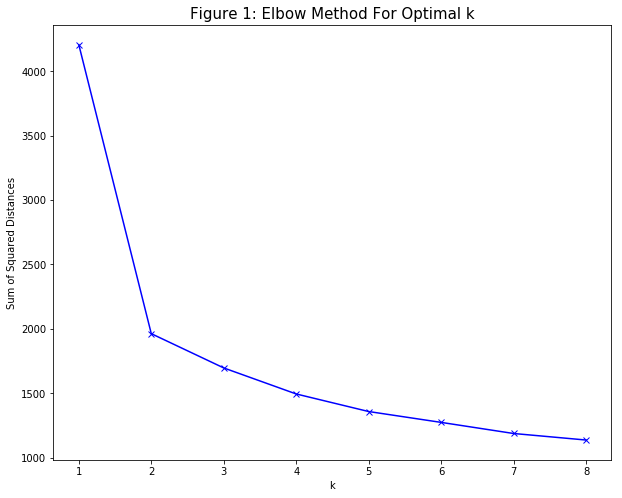

In [23]:
# elbow plot to determine optimal k for kmeans clustering 
# code is from https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
plt.figure(figsize=(10,8))
Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vals)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k', fontsize=10)
plt.ylabel('Sum of Squared Distances', fontsize=10)
plt.title('Figure 1: Elbow Method For Optimal k', fontsize=15)

**Figure 1**: Elbow plot to determine optimal k for kmeans clustering of time series of the number of business estabishments by NYC zipcode for each year between 1994 and 2014. The plot shows the sum of squared distances for k in the range (1,9). The elbow of the plot indicates the optimal k value for clustering. The plot is not incredibly helpful because there is no clear elbow that helps me to definitively decide on a k value. I will try clustering with a few different values of k based on what I see in the plot.

In [24]:
# cluster with kmeans
# use 6 for the number of clusters 
km = KMeans(n_clusters=6, random_state=1964).fit(vals)
# each observation in the km object has a label: 
# that is the cluster assigned to that observation
# populate a column with corresponding cluster IDs for each zipcode
zbp_new_index['cluster_groups'] = km.labels_
# zipcode is assigned a cluster ID 
# there are 6 cluster IDs total 
# how many zip codes belong to each cluster group?
zbp_new_index.cluster_groups.value_counts()

0    115
5     47
1     46
3     20
4     17
2     17
Name: cluster_groups, dtype: int64

In [25]:
# cluster with kmeans
# use 5 for the number of clusters 
km = KMeans(n_clusters=5, random_state=1964).fit(vals)
# each observation in the km object has a label: 
# that is the cluster assigned to that observation
# populate a column with corresponding cluster IDs for each zipcode
zbp_new_index['cluster_groups'] = km.labels_
# zipcode is assigned a cluster ID 
# there are 6 cluster IDs total 
# how many zip codes belong to each cluster group?
zbp_new_index.cluster_groups.value_counts()

0    162
3     38
1     28
2     19
4     15
Name: cluster_groups, dtype: int64

In [26]:
# cluster with kmeans
# use 4 for the number of clusters 
km = KMeans(n_clusters=4, random_state=1964).fit(vals)
# each observation in the km object has a label: 
# that is the cluster assigned to that observation
# populate a column with corresponding cluster IDs for each zipcode
zbp_new_index['cluster_groups'] = km.labels_
# zipcode is assigned a cluster ID 
# there are 6 cluster IDs total 
# how many zip codes belong to each cluster group?
zbp_new_index.cluster_groups.value_counts()

0    162
1     56
3     26
2     18
Name: cluster_groups, dtype: int64

Text(0.5,1,'Cluster 3')

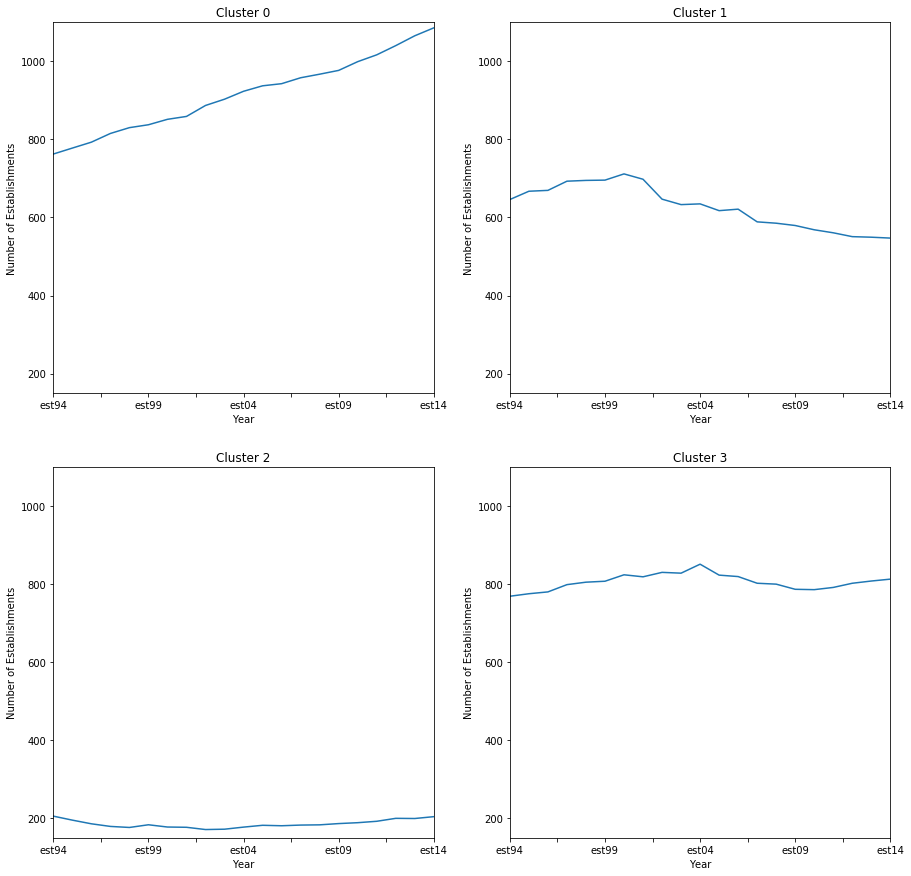

In [27]:
# plot the average number of establishments for each cluster over time (between 1994 and 2014) 
fig = plt.figure(figsize=(15,15))
sub1 = fig.add_subplot(2, 2, 1)
grp = zbp_new_index[zbp_new_index['cluster_groups'] == 0]
grp = grp.drop(['cluster_groups'], axis=1)
means = grp.mean(axis=0)
means.plot()
sub1.set_ylim(150, 1100)
sub1.set_xlabel("Year")
sub1.set_ylabel("Number of Establishments")
sub1.set_title("Cluster 0")

sub2 = fig.add_subplot(2, 2, 2)
grp = zbp_new_index[zbp_new_index['cluster_groups'] == 1]
grp = grp.drop(['cluster_groups'], axis=1)
means = grp.mean(axis=0)
means.plot()
sub2.set_ylim(150, 1100)
sub2.set_xlabel("Year")
sub2.set_ylabel("Number of Establishments")
sub2.set_title("Cluster 1")

sub3 = fig.add_subplot(2, 2, 3)
grp = zbp_new_index[zbp_new_index['cluster_groups'] == 2]
grp = grp.drop(['cluster_groups'], axis=1)
means = grp.mean(axis=0)
means.plot()
sub3.set_ylim(150, 1100)
sub3.set_xlabel("Year")
sub3.set_ylabel("Number of Establishments")
sub3.set_title("Cluster 2")

sub4 = fig.add_subplot(2, 2, 4)
grp = zbp_new_index[zbp_new_index['cluster_groups'] == 3]
grp = grp.drop(['cluster_groups'], axis=1)
means = grp.mean(axis=0)
means.plot()
sub4.set_ylim(150, 1100)
sub4.set_xlabel("Year")
sub4.set_ylabel("Number of Establishments")
sub4.set_title("Cluster 3")

**Figure 2**: Time series of average number of establishments across all zipcodes for each cluster by year (between 1994 and 2014). I chose to use 4 clusters. Although there is not a clear elbow in the elbow method plot above, there does appear to be a change in slope at k=4 which is why I chose 4 clusters. Based on the plots above, in cluster 2, the average number of establishments across zipcodes was low and stayed relatively constant over time. This is probably a residential area that does not have many business establishments, potentially in Staten Island. Number of establishments in cluster 1 increased until 2000 or so and then decreased until 2014. This could potentially be zipcodes in lower Manhattan where establishments were heavily impacted by the events of 9/11/2001. Average number of establishments per zipcode in cluster 3 is high (around 800) and stayed relatively constant between 1994 and 2014. This could be areas of New York that are always bustling, like midtown Manhattan. The average number of establishments per zipcode in cluster 0 increased steadily between 1994 and 2014. This could be areas in Queens and Brooklyn that became more popular as Manhattan became more crowded and people were forced to move further out away from the city.

In [28]:
# reset the index to get zipcode in the table
zbp_with_zip = zbp_new_index.reset_index()

In [29]:
# convert zipcode columns to ints to prepare for merging 
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(int)
zbp_with_zip['ZIPCODE'] = zbp_with_zip['zip'].astype(int)

In [30]:
# merge the dataframes 
merge = zip_shp.merge(zbp_with_zip, left_on='ZIPCODE', right_on='zip', how='inner')

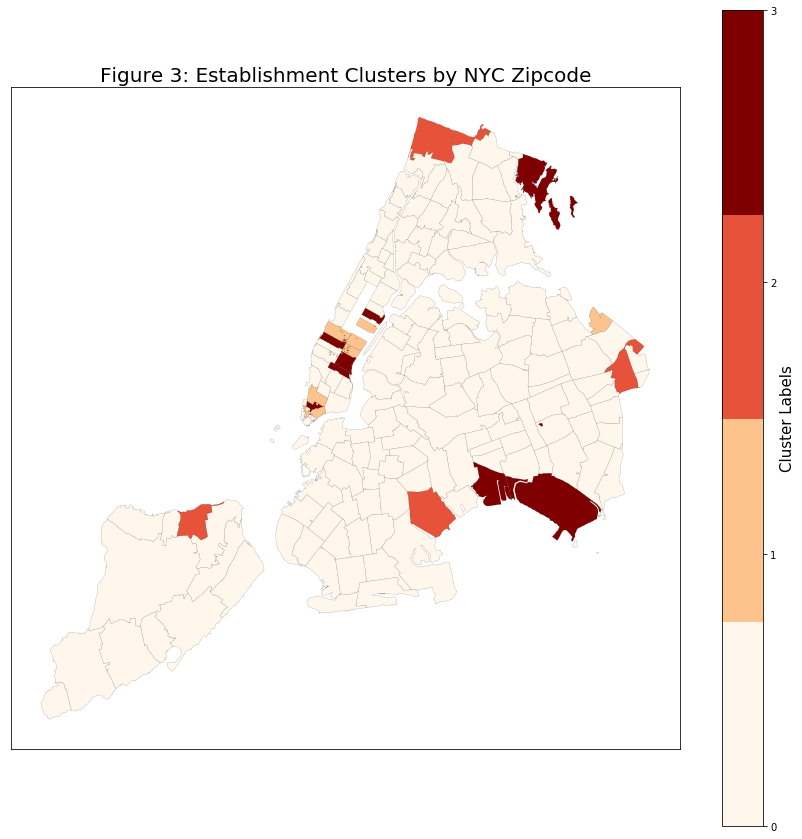

In [31]:
# plot the zipcodes with a colormap depicting the different clusters. 
# Ursula provided this code 
f, ax  = plt.subplots(figsize=(15,15))
cmap = plt.cm.get_cmap('OrRd', 4)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
base = merge.plot(column='cluster_groups', edgecolor='k', cmap=cmap, alpha=1, 
                 linewidth=0.1, ax=ax, legend=False)
ax.set_title('Figure 3: Establishment Clusters by NYC Zipcode', fontsize=20)
norm = mpl.colors.Normalize(vmin=0, vmax=3)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, ticks = np.linspace(0,4,5))
cb.set_label('Cluster Labels', fontsize=15)
ax.set_aspect(1)

**Figure 3**: Choropleth of cluster centers for 4 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes. The color of the zipcode area on the map indicates the cluster it belongs to for number of establishments. The lightest color is cluster 0, and the colors get darker red as the cluster number increases. The darkest red areas belong to cluster 3. Plotting the clusters by zipcode on a map really helps to visualize which clusters correspond to which areas of the city. My predictions from the mean plots above were not very accurate. Cluster 2, which had a low number of establishments and stayed relatively constant over time, represents a few zipcodes on the outskirts of New York City (one in Staten Island, one in far east Brooklyn, one in north Bronx, and one in far northeast Queens). It makes sense that there are not many establishments in these zip codes and there was not much change over time. Cluster 1 is in fact some zipcodes in lower Manhattan around the World Trade Center. Cluster 1 also includes zip codes in north midtown just south of Central Park. This has always been a busy area of Manhattan, so it's possible that this area was saturated with establishments which is why number of establishments did not increase over time and actually showed a downward trend between 2011 and 2014. Cluster 3 stayed relatively constant over time and represents zipcodes in midtown Manhattan and far east Queens in Howard Beach and where JFK is located. These are not areas that I would expect to get very built up over time. The rest of the zipcodes in New York City belong to cluster 0. Cluster 0 showed strong growth in average number of establishments between 1994 and 2014. It makes sense that most of NYC beongs to cluster 0 because the population of New York City increased 11% between 1990 and 2010 according to census data (https://www1.nyc.gov/assets/planning/download/pdf/data-maps/nyc-population/historical-population/nyc_total_pop_1900-2010.pdf). 

## Hierarchical Clustering

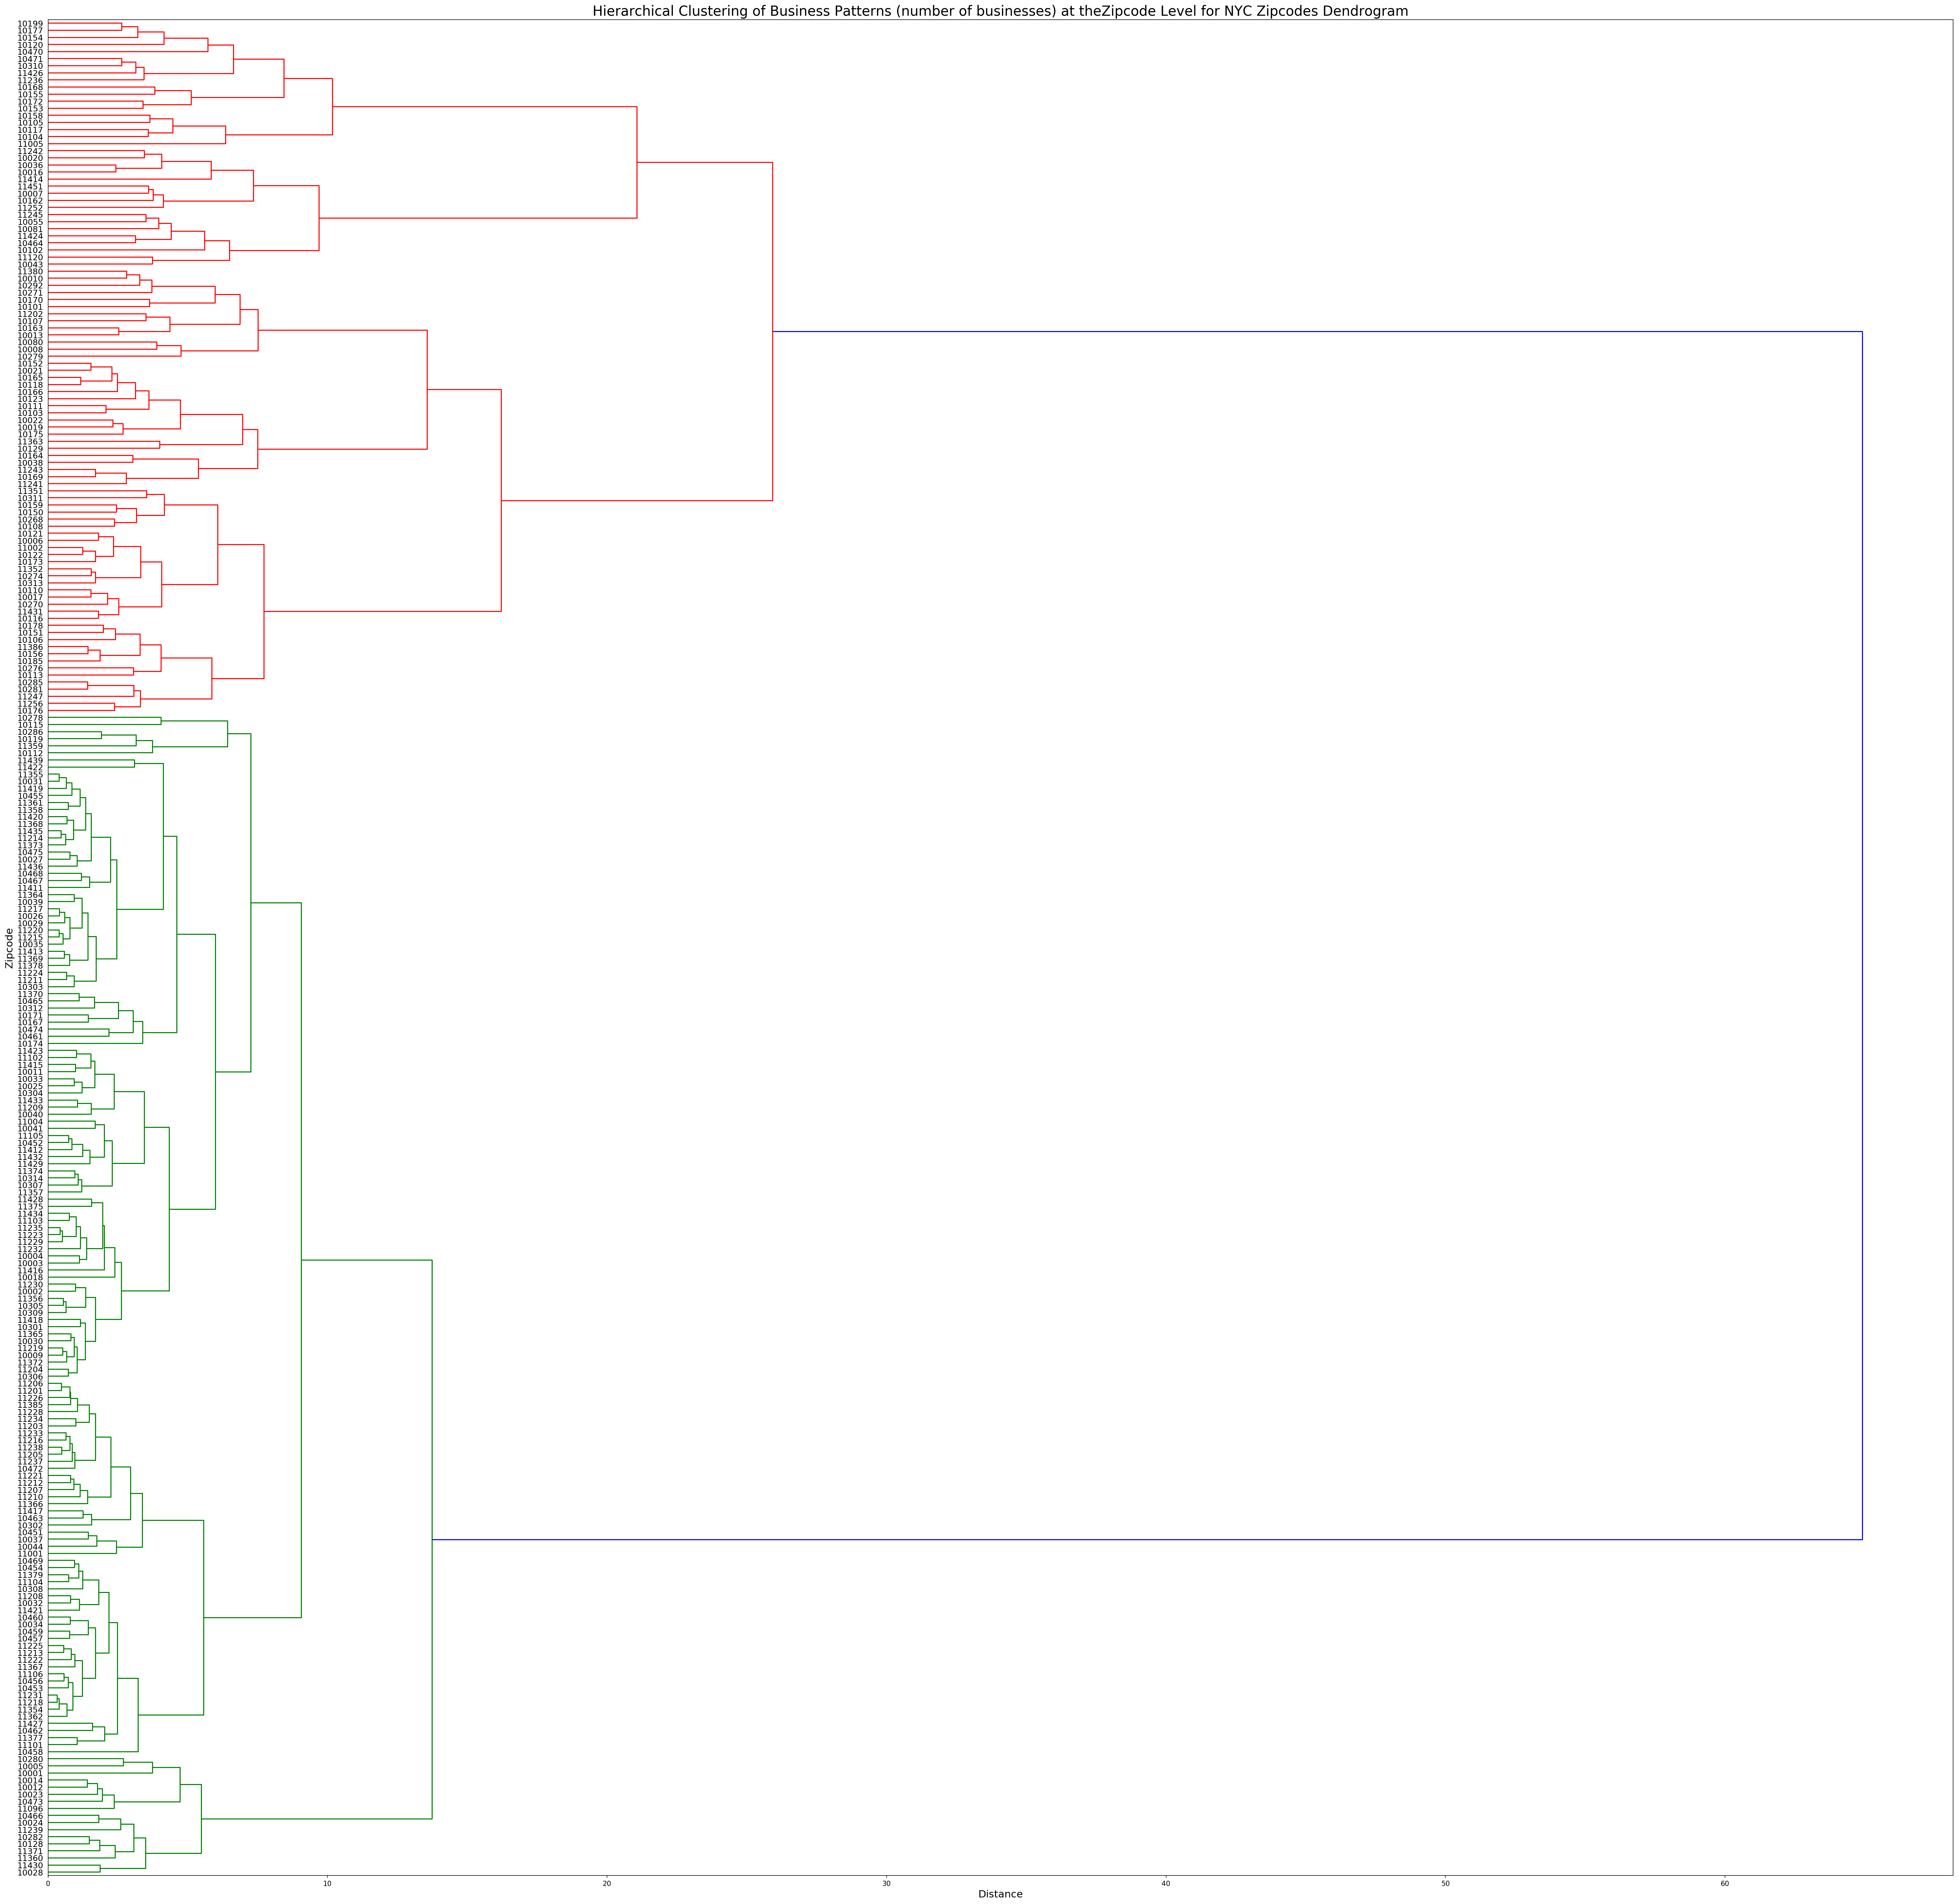

In [32]:
# hierarchical clustering
fig = plt.figure(figsize=(50, 50), dpi=150)
plt.xlabel('Distance', fontsize=15)
plt.ylabel('Zipcode', fontsize=15)
plt.title('Hierarchical Clustering of Business Patterns (number of businesses) at the' + 
          'Zipcode Level for NYC Zipcodes Dendrogram', fontsize=20)
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                              labels = vals.index.astype(int), orientation='right', leaf_font_size=12.)

**Figure 4**: Dendrogram of hierarchical clustering of business patterns (number of businesses) at the zipcode Level for NYC zipcodes. A dendrogram is a visualization in the form of a tree showing the order and distances of merges during the hierarchical clustering. Horizontal lines represent cluster merges. Vertical lines indicate which clusters were part of the merge forming the new cluster. Heights of the horizontal lines tell us about the distance that needs to be "bridged" to form the new cluster. The distance represents the dissimilarity between clusters. Zipcodes that have similar time series behavior are clustered at small distances. For zipcodes that have time series that are dissimilar to each other, the distances are larger. The graph is a little difficult to interpret because there are so many zipcodes on the y axis of the dendrogram.

## Final Discussion

Clustering the business time series (number of businesses) at the zipcode level for NYC zipcodes between 1994 and 2014 reveals some interesting patterns. Notably, the largest cluster of zip codes is the cluster that showed strong growth in average number of establishments per year between 1994 and 2014. Intuitively, this makes sense because NYC has been booming since Rudy Giuliani was mayor beginning in 1994. Giuliani brought economic and business expansion to NY and this continued in the decade after he was mayor. This pattern can be visualized in the choropleth in figure 3. Also, the hierarchical clustering dendrogram in figure 4 shows that clusters of zip code time series are similar to each other because they small distances within them, while dissimilar from external clusters because external clusters have large distances between them. Clustering is an exploratory tool so it's difficult to make definitive interpretations based on clustering. Clustering the data helps identify patterns that can be further investigated to determine why certain zip codes are showing similar behavior to each other.